In [343]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

#load in cleaned and transformed data file
df = pd.read_csv("Data\\Export\\central_dem_grades_clean.csv")

#convert date of birth column from str to datetime type, extract year, drop date column
df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'], format = '%Y-%m-%d')
df['Birth_Year'] = df['Date_of_Birth'].dt.year
df = df.drop('Date_of_Birth', axis = 1)

#show first 5 rows
#df.head()


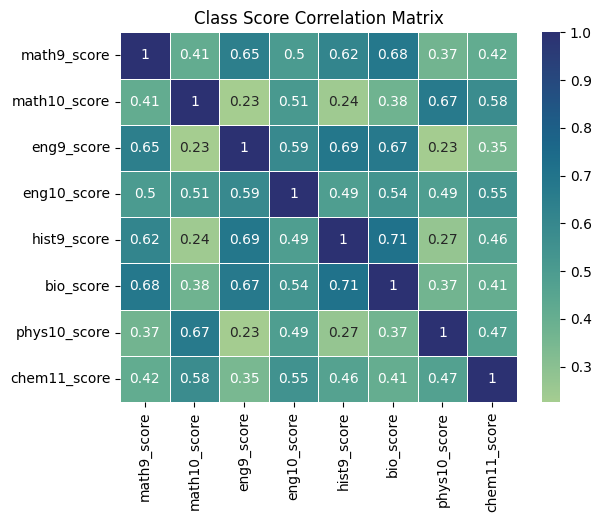

In [342]:
import seaborn as sns
core_courses = ['math9_score', 'math10_score', 'eng9_score', 'eng10_score', 
                'hist9_score', 'bio_score', 'phys10_score', 'chem11_score']

corr_matrix = df[core_courses].corr()
#corr_matrix['chem11_score']

fig, ax = plt.subplots()
sns.heatmap(corr_matrix, annot=True, cmap = "crest", linewidths= 0.5)
ax.set(title= 'Class Score Correlation Matrix')

plt.show()

In [328]:
#asscociation rule mining for categorical data and Chem Grades
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth, association_rules

all_categories = ['ID', 'chem11', 'Gender', 'Counselor', 'ELL_Status', 
                  'Double_Math', 'FRPL_Status', 'Home_Language', 
                  'Race_Ethnicity', 'Special_Education_Status']

#replace coded values with text (must be string for encoder to work) for each column
df_rules = df[all_categories].set_index('ID')
df_rules['chem11'] = df_rules['chem11'].replace({0: 'No Chem', 1: "Chem 1", 2: "Chem 1 Hon", 5: "Chem 1 Bi"})
df_rules['Gender'] = df_rules['Gender'].replace({0: 'Female', 1: "Male"})
df_rules['Counselor'] = df_rules['Counselor'].astype(str)
df_rules['ELL_Status'] = df_rules['ELL_Status'].replace({False: 'NonELL', True: "ELL"})
df_rules['Double_Math'] = df_rules['Double_Math'].replace({0: 'Math1', 1: "Math2"})
df_rules['FRPL_Status'] = df_rules['FRPL_Status'].replace({1: 'Paid Lunch', 2: "Reduced Lunch", 3: "Free Lunch"})
df_rules['Home_Language'] = df_rules['Home_Language'].replace({0: 'English', 1: "Spanish"})
df_rules['Home_Language'] = df_rules['Home_Language'].replace([2, 3, 4, 5, 6], "Other")
df_rules['Race_Ethnicity'] = df_rules['Race_Ethnicity'].replace({5: 'White', 4: "Asian", 3: "Hispanic", 2: "Black", 1: "Multi", 0: "Native"})
df_rules['Special_Education_Status'] = df_rules['Special_Education_Status'].replace({False: 'NoSPED', True: "SPED"})

#convert df to list of lists
list_rules = df_rules.values.tolist()

te = TransactionEncoder()
te_ary = te.fit(list_rules).transform(list_rules)
df_rules2 = pd.DataFrame(te_ary, columns=te.columns_)

#create df of most common occuring demographic info
frequent_itemsets = fpgrowth(df_rules2, min_support=0.05, use_colnames=True)

#create rules based on lift metric
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.20)
#rules.sort_values(['lift'], ascending = False)

#extract rules for Chem1
rules[rules["consequents"].apply(lambda x: 'Chem 1' in str(x))].sort_values(['lift'], ascending = False).head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
20874,"(Paid Lunch, NoSPED)","(Hispanic, Chem 1, NonELL)",0.219340,0.112028,0.050708,0.231183,2.063611,0.026135,1.154984,0.660226
20856,"(Paid Lunch, Hispanic, NonELL, NoSPED)",(Chem 1),0.133255,0.188679,0.050708,0.380531,2.016814,0.025565,1.309704,0.581680
20902,"(Paid Lunch, NonELL, Math1, NoSPED)",(Chem 1),0.168632,0.188679,0.062500,0.370629,1.964336,0.030683,1.289099,0.590499
20866,"(Paid Lunch, NonELL, NoSPED)","(Hispanic, Chem 1)",0.192217,0.134434,0.050708,0.263804,1.962329,0.024867,1.175727,0.607096
20912,"(Paid Lunch, Math1, NoSPED)","(Chem 1, NonELL)",0.195755,0.166274,0.062500,0.319277,1.920191,0.029951,1.224766,0.595861


In [329]:
#asscociation rule mining for categorical data and Chem Grades
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

all_categories = ['ID', 'chem11', 'Counselor']

#replace coded values with text (must be string for encoder to work) for each column
df_rules = df[all_categories].set_index('ID')
df_rules['chem11'] = df_rules['chem11'].replace({0: 'No Chem', 1: "Chem 1", 2: "Chem 1 Hon", 5: "Chem 1 Bi"})
df_rules['Counselor'] = df_rules['Counselor'].astype(str)


#convert df to list of lists
list_rules = df_rules.values.tolist()

te = TransactionEncoder()
te_ary = te.fit(list_rules).transform(list_rules)
df_rules2 = pd.DataFrame(te_ary, columns=te.columns_)

#create df of most common occuring demographic info
frequent_itemsets = fpgrowth(df_rules2, min_support=0.05, use_colnames=True)

#create rules based on lift metric
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.20)
rules.sort_values(['lift'], ascending = False)

#extract rules for Chem1
#rules[rules["consequents"].apply(lambda x: 'Chem 1' in str(x))].sort_values(['lift'], ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(34),(No Chem),0.095519,0.741745,0.081368,0.851852,1.148443,0.010517,1.743219,0.142906
0,(19),(No Chem),0.120283,0.741745,0.100236,0.833333,1.123476,0.011016,1.549528,0.124933
3,(37),(No Chem),0.080189,0.741745,0.063679,0.794118,1.070607,0.004200,1.254380,0.071700
5,(22),(No Chem),0.101415,0.741745,0.077830,0.767442,1.034643,0.002606,1.110495,0.037262
1,(10),(No Chem),0.095519,0.741745,0.073113,0.765432,1.031934,0.002263,1.100981,0.034214
8,(28),(No Chem),0.074292,0.741745,0.055425,0.746032,1.005779,0.000318,1.016878,0.006207
7,(31),(No Chem),0.130896,0.741745,0.091981,0.702703,0.947364,-0.005111,0.868675,-0.060087
4,(25),(No Chem),0.121462,0.741745,0.082547,0.679612,0.916233,-0.007547,0.806068,-0.094256
6,(13),(No Chem),0.095519,0.741745,0.063679,0.666667,0.898781,-0.007171,0.774764,-0.110725
9,(16),(No Chem),0.084906,0.741745,0.051887,0.611111,0.823883,-0.011092,0.664084,-0.189364


In [330]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

#create list of categorical features
category_features = ['Gender', 'Counselor', 'ELL_Status', 'schoolName']

#use one hot encoder method to create an array of encoded data
ohn_data = pd.DataFrame(ohe.fit_transform(df[category_features]).toarray())

#create a dictionary of the encoded columns with meaningful names
ohn_columns = {0: 'Female', 1: 'Male', 2: 'Counselor10', 3: 'Counselor13', 4: 'Counselor16', 5: 'Counselor16', 6: 'Counselor19',
               7: 'Counselor22', 8: 'Counselor25', 9: 'Counselor28', 10: 'Counselor31', 11: 'Counselor34', 12: 'Counselor37', 
               13: 'Non-ELL', 14: 'ELL'}

#replace the column names with meaningful names
ohn_data = ohn_data.rename(columns=ohn_columns)

#create new df by joining categorical data array with non categorical array 
new_df = df.join(ohn_data)

#drop non encoded categorical data
new_df = new_df.drop(category_features, axis=1)

#drop all missing values 
new_df = new_df.dropna()

#create new idexes
new_df = new_df.set_index('ID')

new_df.head()

,math9,math9_score,math10,math10_score,eng9,eng9_score,eng10,eng10_score,hist9,hist9_score,...,Counselor16,Counselor19,Counselor22,Counselor25,Counselor28,Counselor31,Counselor34,Counselor37,Non-ELL,ELL
ID,,,,,,,,,,,,,,,,,,,,,
2241045,5,90.000000,1,81.439999,5,85.000000,2,94.489998,2,90.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2240018,1,81.834999,1,77.224998,2,69.349998,2,84.754997,2,73.639999,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2240019,1,90.310001,2,68.365002,1,95.625000,1,67.299999,1,92.969997,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2240020,1,84.369999,1,71.895000,1,96.684998,1,87.379997,1,85.254997,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2240031,1,54.220000,1,65.084999,1,67.159998,1,68.880001,1,73.365000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


[Text(0.5, 1.0, 'Chem scores based on attributes'),
 Text(0.5, 0, 'Factor Analysis Score'),
 Text(0, 0.5, 'Chem11 Score')]

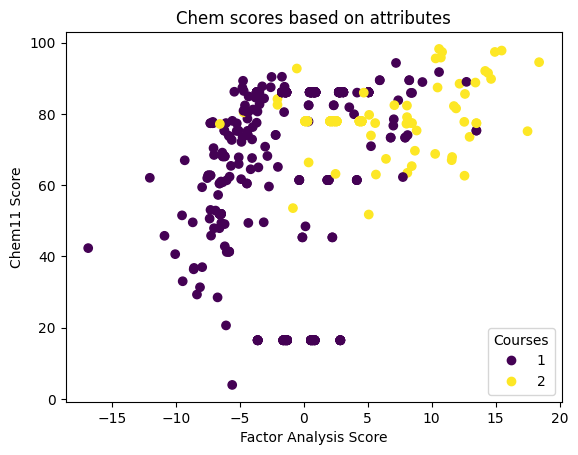

In [337]:
#dimensionality reduction to plot chem scores vs other factors
#Factor analysis of mixed data https://pypi.org/project/prince/0.7.1/
from prince import FAMD

#drop NaN 
FAMD_df = df.dropna()
FAMD_df = FAMD_df.set_index(['ID'])

#drop chem course and score columns
FAMD_df_labels = FAMD_df[['chem11', 'chem11_score']]
FAMD_df2 = FAMD_df.drop(['chem11', 'chem11_score'], axis='columns')

#set up FAMD method
famd = FAMD(
     n_components=1,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='sklearn',
     random_state=42
)

#use function to reduce dimensionality
famd =famd.fit(FAMD_df2)
FAMD_1D = famd.row_coordinates(FAMD_df2)

#join reduced datafram with labeled data based on ID
FAMD_1D_labels = FAMD_1D.join(FAMD_df_labels).reset_index()\

#create graph of reduced component and chem score with colors for courses
x = FAMD_1D_labels[0]
y = FAMD_1D_labels['chem11_score']
c = FAMD_1D_labels['chem11']

fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=c)

#create legend
legend = ax.legend(*scatter.legend_elements(),
                   title = 'Courses', 
                   loc = 'lower right')
ax.set(title= "Chem scores based on attributes", xlabel = 'Factor Analysis Score',
     ylabel = 'Chem11 Score')

In [332]:
#KNN Supervised ML for predition of which students would enroll in Chem
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Create feature and target arrays
X = new_df.drop(['chem11', 'chem11_score'], axis=1)
X = X.values
y = new_df['chem11']
y = y.values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=903)
  
knn = KNeighborsClassifier(n_neighbors=3)
  
knn.fit(X_train, y_train)
  
# Predict on dataset which model has not seen before
pred =knn.predict(X_test) 

#print statistics to measure the model's performance 
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Confusion Matrix: \n", confusion_matrix(y_test, pred))
print("Accuracy Score:", accuracy_score(pred,y_test))
print("Precision:", precision_score(pred, y_test))
print("Recall:", recall_score(pred, y_test))


Confusion Matrix: 
 [[28  5]
 [ 9  1]]
Accuracy Score: 0.6744186046511628
Precision: 0.8484848484848485
Recall: 0.7567567567567568


In [333]:
#2D dimensionality reduction for ML 
df_ML= df

df_ML['Chem11_grade'] = pd.cut(x=df_ML['chem11_score'], 
                                     bins=[0, 59.5, 69.5, 79.5, 89.5, 100],
                                     labels = ['F', 'D', 'C', 'B', 'A'])

df_ML_train = df_c_means[df_ML['chem11']>0]
df_ML_test = df_c_means[df_ML['chem11'] == 0]

#reset index to id 
df_ML_train = df_ML_train.set_index(['ID'])
df_ML_test = df_ML_test.set_index(['ID'])

#extract labels and drop nan
df_ML_labels = df_ML_train[['chem11', 'chem11_score', 'Chem11_grade']]
df_ML_train = df_ML_train.drop(['chem11', 'chem11_score', 'Chem11_grade'], axis = 1)
df_ML_train = df_ML_train.dropna()

df_ML_test = df_ML_test.drop(['chem11', 'chem11_score', 'Chem11_grade'], axis = 1)
df_ML_test = df_ML_test.dropna()

c:\Users\Michael\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


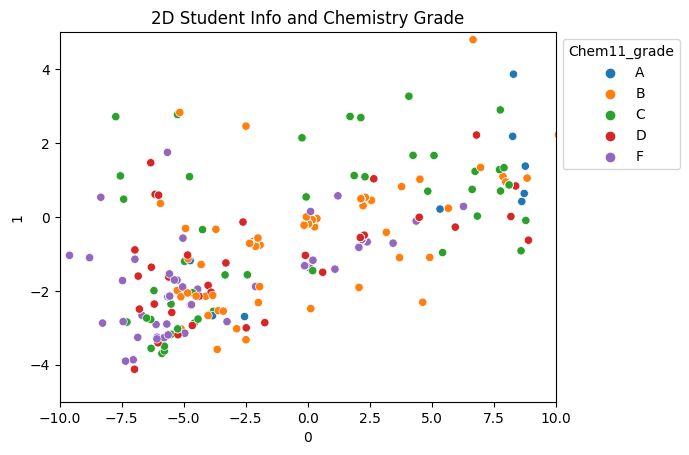

In [334]:
#set up FAMD method
famd_2D = FAMD(n_components=2,n_iter=3,copy=True,check_input=True,engine='sklearn',random_state=42)
famd2_2D = FAMD(n_components=2,n_iter=3,copy=True,check_input=True,engine='sklearn',random_state=42)

#reduce dimensions for training set
famd_2D =famd_2D.fit(df_ML_train)
df_ML_train_reduced = famd_2D.row_coordinates(df_ML_train)
df_ML_train_reduced = df_ML_train_reduced
df_ML_train_reduced_labels = df_ML_train_reduced.join(df_ML_labels['Chem11_grade']).reset_index()


famd2_2D =famd2_2D.fit(df_ML_test)
df_ML_test_reduced = famd2_2D.row_coordinates(df_ML_test)
df_ML_test_reduced = df_ML_test_reduced.reset_index()

#plot 2D data
x = df_ML_train_reduced_labels[0]
y = df_ML_train_reduced_labels[1]
colors = df_ML_train_reduced_labels['Chem11_grade']

fig, ax = plt.subplots()
sns.scatterplot(x, y, hue=colors, hue_order = ['A', 'B', 'C', 'D', 'F'])
ax.set(xlim = (-10, 10), ylim = (-5, 5), title = "2D Student Info and Chemistry Grade")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


C:\Users\Michael\AppData\Local\Temp\ipykernel_13604\2312253758.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(x, y, z, s=40, #c=colors,
c:\Users\Michael\anaconda3\lib\site-packages\matplotlib\collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


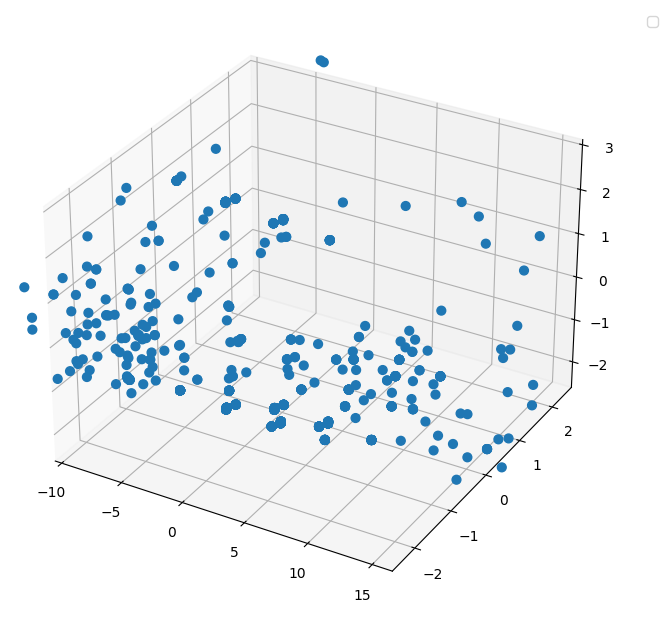

In [335]:
import re, seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

#set up FAMD method
famd = FAMD(n_components=3,n_iter=3,copy=True,check_input=True,engine='sklearn',random_state=42)
famd2 = FAMD(n_components=3,n_iter=3,copy=True,check_input=True,engine='sklearn',random_state=42)

#reduce dimensions for training set
famd =famd.fit(df_ML_train)
df_ML_train_reduced = famd.row_coordinates(df_ML_train)
df_ML_train_reduced = df_ML_train_reduced
df_ML_train_reduced_labels = df_ML_train_reduced.join(df_ML_labels['Chem11_grade']).reset_index()


famd2 =famd2.fit(df_ML_test)
df_ML_test_reduced = famd2.row_coordinates(df_ML_test)
df_ML_test_reduced = df_ML_test_reduced.reset_index()

# list data
x = df_ML_train_reduced_labels[0]
y = df_ML_train_reduced_labels[1]
z = df_ML_train_reduced_labels[2]
#colors = df_ML_train_reduced_labels['Chem11_grade']

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, #c=colors, 
            marker='o', cmap=cmap, alpha=1)
ax.set(xlim = (-10, 16), ylim = (-2.5, 2.5), zlim = (-2.5, 3))

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

In [231]:
#fuzzy machine learning to predict students grades
#Source: https://towardsdatascience.com/machine-learning-with-fuzzy-logic-52c85b46bfe4

import skfuzzy as fuzz
from skfuzzy import control as ctrl

class Fuzzify(object):
    def __init__(self, data_series, Min, Max, Mid):
        """Create a triangular membership function with a data series and its max, min and median"""
        
        self.data = data_series
        self.low = Min
        self.high = Max
        self.mid = Mid
        self.universe = np.arange(np.floor(self.low), np.ceil(self.high)+0.2, 0.1)
        self.trimf_low  = fuzz.trimf(self.universe, [self.low, self.low, self.mid])
        self.trimf_mid = fuzz.trimf(self.universe, [self.low, self.mid, self.high+0.1])
        self.trimf_hi  =  fuzz.trimf(self.universe, [self.mid, self.high+0.1, self.high+0.1])
        
    def get_universe(self):
        return self.universe
        
    def get_membership(self):
        """Assign fuzzy membership to each observation in the data series and return a dataframe of the result"""
        
        new_df = pd.DataFrame(self.data)
        new_df['low'] = fuzz.interp_membership(self.universe, self.trimf_low, self.data)
        new_df['mid'] = fuzz.interp_membership(self.universe, self.trimf_mid, self.data)
        new_df['high'] = fuzz.interp_membership(self.universe, self.trimf_hi, self.data)
        new_df['membership'] = new_df.loc[:, ['low', 'mid', 'high']].idxmax(axis = 1)
        new_df['degree'] = new_df.loc[:, ['low', 'mid', 'high']].max(axis = 1)
        return new_df




In [257]:
#apply fuzzy logic to component1
component1 = df_ML_train_reduced_labels.iloc[:,1]

component1_min = -9.6044 #min outlier -16.25
component1_max = 13.5270 #max outlier 18.7067
component1_mid = np.median(np.arange(component1_min, component1_max, 0.1))

component1_object = Fuzzify(component1, component1_min, component1_max, component1_mid)
fuzzified_component1 = component1_object.get_membership()

#apply fuzzy logic to component2
component2 = df_ML_train_reduced_labels.iloc[:,2]

component2_min = component2.min() #no min outlier
component2_max = 4.796291 #max outlier 62.792
component2_mid = np.median(np.arange(component2_min, component2_max, 0.1))

component2_object = Fuzzify(component2, component2_min, component2_max, component2_mid)
fuzzified_component2 = component2_object.get_membership()